In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
NOME_PT = {"Accuracy" : "Acurácia", "Precision" : "Precisão", "Recall": "Recall",}
MARKERS = {'Regressão Logística' : '*', 'XGBoost' : 's', 'MLP': '>', "DQN": 'o'}

def plot_metrics(metric, ax, legend=False):
    # Define metrics and models
    models = ["log_reg", "xgb", "mlp", "dqn"]
    colors = ['red', 'blue', 'green','black']
    labels = ['Regressão Logística', 'XGBoost', 'MLP', "DQN"]

    for model, color, label in zip(models, colors, labels):
        # Load the per-round data for the model
        data = pd.read_csv(f"{model}_plot.csv")
        data['round'] = data.index + 1  # Add round numbers

        ax.plot(data['round'], data[metric].rolling(5).mean(),color=color, 
                label=f"{label}", linestyle='-', linewidth=2.5,
                  marker=MARKERS[label], markevery=10, markersize=5)
        
    ax.set_xlabel('Rodadas de Comunicação (#)')
    ax.set_ylabel(f'{NOME_PT[metric]} (%)')
    ax.set_title(f"{NOME_PT[metric]}")
    ax.set_ylim(0.6, 1)  # Set y-axis limits
    ax.grid(True, linestyle=':')  
        
    # Adjust the legend position
    if legend:
        ax.legend(loc='upper center', bbox_to_anchor=(0.3, -0.3), ncol=4, frameon=False)

    # ax.plt.tight_layout()  # Adjust layout to prevent clipping

    # Save the figure
    # ax.plt.savefig(f"{metric}.png")
    # plt.clf()  # Clear the figure for the next plot

# plt.show()  # Show all plots at once

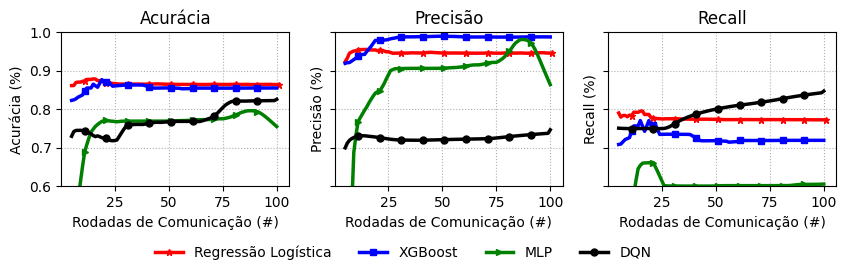

In [74]:
fig, ax = plt.subplots(figsize=(10, 2), nrows=1, ncols=3, sharey=True)

for idx_plot, metric in enumerate(["Accuracy", "Precision", "Recall"]):
    
    plot_metrics(metric, ax[idx_plot], legend=True if idx_plot == 1 else False)

plt.savefig("metrics.png", bbox_inches='tight', dpi=300)

In [ ]:
data = pd.read_csv(f"{model}_plot.csv")
# data

,Model Name,Loss,Accuracy,Precision,Recall
0,DQN,0.528641,0.684866,0.662935,0.752043
1,DQN,0.616092,0.731607,0.691783,0.751016
2,DQN,0.726734,0.743839,0.707382,0.750673
3,DQN,0.833320,0.744375,0.715638,0.750502
4,DQN,0.932967,0.744687,0.720924,0.750043
...,...,...,...,...,...
95,DQN,0.772665,0.822455,0.737110,0.842131
96,DQN,0.780473,0.822455,0.737506,0.842830
97,DQN,0.766975,0.822679,0.737896,0.843513
98,DQN,0.746129,0.822857,0.738281,0.844183
